<a href="https://colab.research.google.com/github/Barbara-sudo/partage/blob/main/Cell_Atlas_proejc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Challenge Cell Atlas 2021**`



**Task**: Identifying the localisation of the protein. 

**Dataset**: consists of 50k images for training where we provide the label, and 10k images for testing where we do not provide the label.

The color (3-channel RGB) images are of size 32x32. The images are corrupted by noise that follows a Bernoulli distribution, and is similar to impulse noise. You can consider the noise as dead pixels in an image and the values are always 0.


Sources: https://www.tensorflow.org/tutorials/images/cnn

 1- Charger les packages jeu de données

In [2]:
import os
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf  
from tensorflow.keras import datasets, layers, models 
from keras.preprocessing.image import ImageDataGenerator




In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
#os.mkdir("drive/My Drive/Cell_Atlas")
os.chdir('drive/My Drive/Cell_Atlas/')





In [1]:
os.getcwd()

NameError: ignored

In [ ]:
#charger les données X = images_train, y = Images_test, labels = labels_train

X = np.load('mData/images_train_m1.npz')['arr_0']

y = np.load('mData/images_test_m1.npz')['arr_0']

data_train = np.load('rawData/data_train.npz')


In [ ]:
labels = data_train['labels']
lab = tf.keras.utils.to_categorical(labels, num_classes=20)
labels_onehot = tf.constant(lab, shape=[50000, 20])
#labels_onehot[0:10]

In [ ]:
labels[0:10]

array([14,  5,  5,  1, 17,  5, 11, 19, 18,  5], dtype=int32)

In [ ]:
datagen = ImageDataGenerator( validation_split=0.2,  width_shift_range=0.2,
    height_shift_range=0.2, horizontal_flip=True,  rotation_range=20)


In [ ]:
train_generator = datagen.flow(X, labels_onehot, batch_size = 32, subset='training')
validation_generator =datagen.flow(X, labels_onehot, batch_size = 32, subset='validation')


In [ ]:
#len(train_generator)
len(validation_generator)

625

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #input shape ok
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='softmax'))
model.add(layers.Dense(20))

In [ ]:
model.compile(optimizer= "adam",
              loss = tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


In [ ]:
40000/2500

16.0

In [ ]:
EPOCHS = 10

# construct the training image generator for data augmentation
# train the netwo
history = model.fit(train_generator,steps_per_epoch= 1250, validation_data = validation_generator, validation_steps = 313,
	epochs=EPOCHS)



Epoch 1/10
1250/1250 [==============================] - 24s 19ms/step - loss: 9.5381 - accuracy: 0.0504 - val_loss: 9.3388 - val_accuracy: 0.0515
Epoch 2/10
1250/1250 [==============================] - 24s 19ms/step - loss: 9.2631 - accuracy: 0.0497 - val_loss: 8.6715 - val_accuracy: 0.0515
Epoch 3/10
1250/1250 [==============================] - 25s 20ms/step - loss: 8.6534 - accuracy: 0.0497 - val_loss: 8.5829 - val_accuracy: 0.0515
Epoch 4/10
1250/1250 [==============================] - 24s 19ms/step - loss: 8.7146 - accuracy: 0.0497 - val_loss: 8.6200 - val_accuracy: 0.0515
Epoch 5/10
1250/1250 [==============================] - 24s 19ms/step - loss: 8.7034 - accuracy: 0.0497 - val_loss: 8.6071 - val_accuracy: 0.0515
Epoch 6/10
 676/1250 [===============>..............] - ETA: 9s - loss: 8.7222 - accuracy: 0.0485

KeyboardInterrupt: ignored

313/313 - 1s - loss: 1.5342 - accuracy: 0.5211


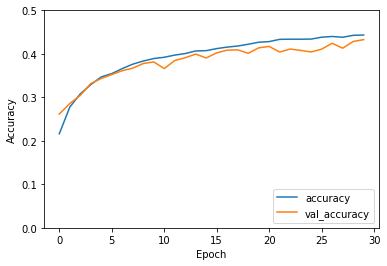

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.5])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X[40000:50000],  labels[40000:50000], verbose=2)

313/313 - 1s - loss: 1.4199 - accuracy: 0.5510


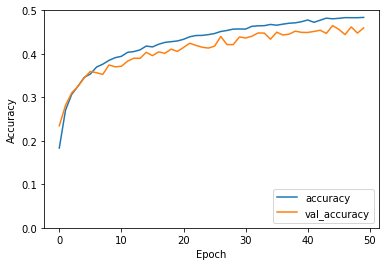

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.5])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X[40000:50000],  labels[40000:50000], verbose=2)

In [ ]:
#save the model
from tensorflow.keras.models import Sequential, save_model, load_model
save_model(model, "models/")

INFO:tensorflow:Assets written to: models/assets


In [ ]:
os.listdir("models")

['variables', 'assets', 'saved_model.pb']

In [ ]:
#model = load_model(filepath, compile = True)

In [ ]:
predictions = model.predict(y)
predictions[0]

array([-5.4385176, -0.5855953,  6.5600824,  1.3417222,  2.7999039,
       -1.2672985, -2.2333362,  2.2865489, -3.5982773, -3.8571494,
       -3.745841 , -6.123742 , -5.4363823,  1.1370349, -3.9355402,
       -0.8451457, -4.3324065, -0.2130416, -1.4457055, -2.2668934],
      dtype=float32)

In [ ]:
classes = np.argmax(predictions, axis = 1)
print(classes)

np.save("predictions/pred1")


[ 2 14 18 ...  4 11  2]


TypeError: ignored

In [ ]:
len(classes)

10000

In [ ]:
id = np.arange(10000)
df = pd.DataFrame(id, columns = ['id'])
#df = pd.DataFrame(classes, columns = ['class'])
df['class'] = classes

In [ ]:
df[0:10]

,id,class
0,0,2
1,1,14
2,2,18
3,3,1
4,4,9
5,5,4
6,6,13
7,7,0
8,8,18
9,9,4


In [ ]:
df.to_csv('predictions2.csv', index = False)

In [ ]:
os.listdir()

['images_train_modif.npz',
 'data_train2.npz',
 'mData',
 'models',
 'predictions.csv',
 'rawData',
 'predictions2.csv']

KeyError: ignored

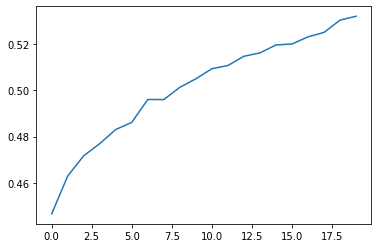

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.5])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(S5_images,  S5_labels, verbose=2)